In [1]:
# BLOQUE 1 

import pandas as pd

database_titanic = pd.read_csv(
    'https://raw.githubusercontent.com/tomasacuna1/Coder-House-/main/train.csv'
)

database_titanic.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [2]:
#BLOQUE 2

# Dimensiones de la tabla
print("Filas y columnas:", database_titanic.shape)

# Tipos de datos
print("\nTipos de datos:")
print(database_titanic.dtypes)

# Datos faltantes
print("\nValores nulos por columna:")
print(database_titanic.isnull().sum())


Filas y columnas: (891, 12)

Tipos de datos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
#BLOQUE 3

database_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#BLOQUE 4

database_titanic["Survived"] = database_titanic["Survived"].astype('bool')

In [5]:
# BLOQUE 5

database_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#BLOQUE 6

database_titanic["Age"].fillna(database_titanic["Age"].median(), inplace=True) 
database_titanic["Cabin"] = database_titanic["Cabin"].fillna("Not_defined")
database_titanic["Embarked"] = database_titanic["Embarked"].fillna("Not_defined")

C:\Users\tomas\AppData\Local\Temp\ipykernel_32036\4104148910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database_titanic["Age"].fillna(database_titanic["Age"].median(), inplace=True)


In [7]:
# BLOQUE 7 

database_titanic.isnull().sum() #Verificación final de nulos

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
# BLOQUE 8

SEP = ','    
DEC = '.'    
TEST_SIZE = 0.25
RANDOM_STATE = 12
MAX_K = 10
TARGET_COL = None
 
print(database_titanic.shape, database_titanic.columns.tolist())


(891, 12) ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
# ======================================
# BLOQUE 9 — Preparación de features (Fare + Deck) y construcción de X / y
# ======================================
import numpy as np
import pandas as pd

df = database_titanic.copy()

# Señales útiles
df['FamilySize'] = df['SibSp'].fillna(0) + df['Parch'].fillna(0) + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# (Opcional) Title desde Name (si no lo quieres, elimina esta sección)
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    title_map = {
        'Mlle':'Miss','Ms':'Miss','Mme':'Mrs','Lady':'Noble','the Countess':'Noble',
        'Sir':'Noble','Don':'Noble','Dona':'Noble','Capt':'Officer','Col':'Officer',
        'Major':'Officer','Jonkheer':'Noble','Rev':'Clergy','Dr':'Professional'
    }
    df['Title'] = df['Title'].replace(title_map)
    comunes = ['Mr','Mrs','Miss','Master','Professional','Officer','Noble']
    df['Title'] = df['Title'].where(df['Title'].isin(comunes), 'Rare')

# Deck desde Cabin (primera letra)
deck = (
    df['Cabin'].astype(str).str.split().str[0].str.extract(r'^([A-Za-z])', expand=False)
)
df['Deck'] = deck.fillna('Unknown')

# Limpiezas mínimas
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
if df['Embarked'].isna().any():
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

# Objetivo: Fare
TARGET_COL = 'Fare'
y = df[TARGET_COL]

# X: quitamos el target y columnas que NO deben ser predictoras
X = df.drop(columns=[TARGET_COL])
for col in ['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin']:
    if col in X.columns:
        X = X.drop(columns=[col])

# Definir numéricas y categóricas para el preprocess
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("X shape:", X.shape, "| y shape:", y.shape)
print("Numéricas:", len(num_cols), "Categóricas:", len(cat_cols))


X shape: (891, 10) | y shape: (891,)
Numéricas: 6 Categóricas: 4


In [10]:
# BLOQUE 10

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# 0) Excluir columnas que NO deben ser predictoras
cols_to_exclude = [c for c in ['PassengerId', 'Name', 'Ticket'] if c in X.columns]
if cols_to_exclude:
    X = X.drop(columns=cols_to_exclude)

# Recalcular listas de columnas tras la exclusión
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# 1) Pipelines de preprocesamiento
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # mantenemos todas las dummies
])

# 2) ColumnTransformer (intentamos nombres sin prefijos)
try:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_cols),
            ("cat", categorical_pipe, cat_cols)
        ],
        remainder="drop",
        verbose_feature_names_out=False  # quita 'num__' y 'cat__' si tu sklearn lo soporta
    )
except TypeError:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_cols),
            ("cat", categorical_pipe, cat_cols)
        ],
        remainder="drop"
    )

# 3) Fit previo para saber cuántas columnas quedan tras el preprocess
X_pre = preprocess.fit_transform(X, y)
n_feats = X_pre.shape[1]
K = min(MAX_K, n_feats) if n_feats > 0 else 0
print(f"Features tras preprocesamiento: {n_feats} | K SelectKBest: {K}")
if K == 0:
    raise ValueError("No hay features disponibles tras el preprocesamiento.")

# 4) Construir nombres legibles
def _prettify(name: str) -> str:
    n = str(name)
    for pref in ("num__", "cat__"):
        if n.startswith(pref):
            n = n[len(pref):]
    feat_map = {
        "Sex": "Sexo",
        "Embarked": "Puerto",
        "Pclass": "Clase",
        "Title": "Título",
        "FamilySize": "TamañoFamilia",
        "IsAlone": "ViajaSolo",
        "SibSp": "Hermanos/Conyuges",
        "Parch": "Padres/Hijos",
        "Age": "Edad",
        "Fare": "Tarifa",
        "Cabin": "Cabina"  
    }
    val_map = {
        "male": "hombre",
        "female": "mujer"
    }
    if "_" in n:
        feat, val = n.split("_", 1)
        return f"{feat_map.get(feat, feat)} = {val_map.get(val, val)}"
    return feat_map.get(n, n) + ("" if n != "IsAlone" else " (1 = sí)")

try:
    ALL_NAMES = list(preprocess.get_feature_names_out())
except Exception:
    ALL_NAMES = []
    ALL_NAMES.extend(num_cols)
    if len(cat_cols) > 0:
        try:
            ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
            ALL_NAMES.extend(list(ohe.get_feature_names_out(cat_cols)))
        except Exception:
            ALL_NAMES.extend(cat_cols)

ALL_NAMES_PRETTY = [_prettify(n) for n in ALL_NAMES]

print("Ejemplos de nombres legibles:")
for a, b in list(zip(ALL_NAMES, ALL_NAMES_PRETTY))[:10]:
    print(f"  {a}  ->  {b}")

# 5) Selector y modelo
selector = SelectKBest(score_func=f_regression, k=K)
linreg = LinearRegression()

pipe = Pipeline([
    ("prep", preprocess),
    ("sel", selector),
    ("linreg", linreg)
])




Features tras preprocesamiento: 29 | K SelectKBest: 10
Ejemplos de nombres legibles:
  Pclass  ->  Clase
  Age  ->  Edad
  SibSp  ->  Hermanos/Conyuges
  Parch  ->  Padres/Hijos
  FamilySize  ->  TamañoFamilia
  IsAlone  ->  ViajaSolo (1 = sí)
  Sex_female  ->  Sexo = mujer
  Sex_male  ->  Sexo = hombre
  Embarked_C  ->  Puerto = C
  Embarked_Not_defined  ->  Puerto = Not_defined


Métricas de Regresión Lineal (en £):
  MAE : £19.38
  RMSE: £33.72
  R²  : 0.377


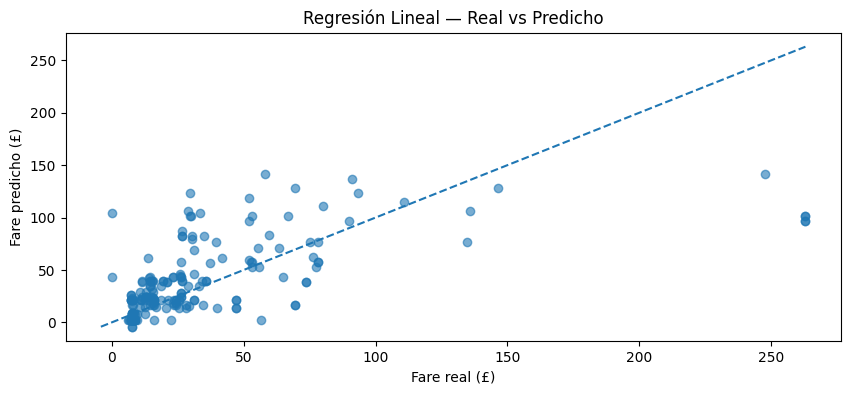

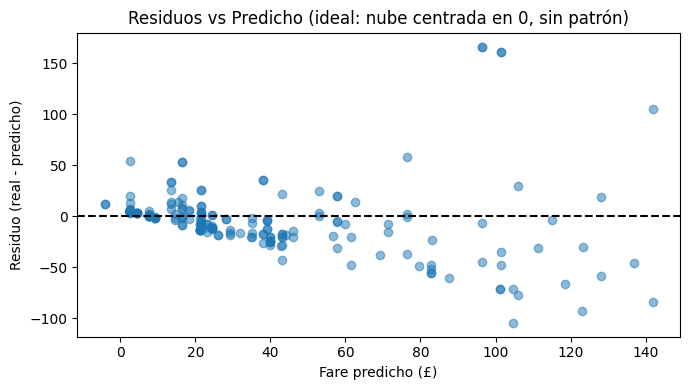

               mean    median        std  count
real_q                                         
Q1(bajo)   2.879924 -3.331961  16.858692     56
Q2         7.421980  7.479836  12.660064     56
Q3        15.161581  6.126389  26.050590     55
Q4(alto) -11.716774 -1.089782  55.374406     56


In [11]:
# BLOQUE 11

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
try:
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print("Métricas de Regresión Lineal (en £):")
print(f"  MAE : £{MAE:.2f}")
print(f"  RMSE: £{RMSE:.2f}")
print(f"  R²  : {R2:.3f}")

# Real vs Predicho
plt.figure(figsize=(10,4))
plt.scatter(y_test, y_pred, alpha=0.6)
lo = min(y_test.min(), y_pred.min())
hi = max(y_test.max(), y_pred.max())
plt.plot([lo, hi], [lo, hi], linestyle='--')
plt.xlabel("Fare real (£)")
plt.ylabel("Fare predicho (£)")
plt.title("Regresión Lineal — Real vs Predicho")
plt.show()

import matplotlib.pyplot as plt

# ======================================
# 11B) Diagnóstico de residuos (opcional)
# ======================================
res = y_test - y_pred

plt.figure(figsize=(7,4))
plt.scatter(y_pred, res, alpha=0.5)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel("Fare predicho (£)")
plt.ylabel("Residuo (real - predicho)")
plt.title("Residuos vs Predicho (ideal: nube centrada en 0, sin patrón)")
plt.tight_layout()
plt.show()

import pandas as pd
aux = pd.DataFrame({"real": y_test, "pred": y_pred})
aux["err"] = aux["pred"] - aux["real"]
aux["real_q"] = pd.qcut(aux["real"], 4, labels=["Q1(bajo)","Q2","Q3","Q4(alto)"])
print(aux.groupby("real_q")["err"].agg(["mean","median","std","count"]))


,Variable,Coeficiente
0,Deck = B,65.595955
1,Deck = C,43.570314
2,Clase,-17.952277
3,Puerto = C,16.701849
4,Deck = N,6.851556
5,ViajaSolo (1 = sí),-6.694536
6,Sexo = mujer,3.946679
7,Sexo = hombre,-3.946679
8,Título = Mr,2.978116
9,Puerto = S,-1.764448


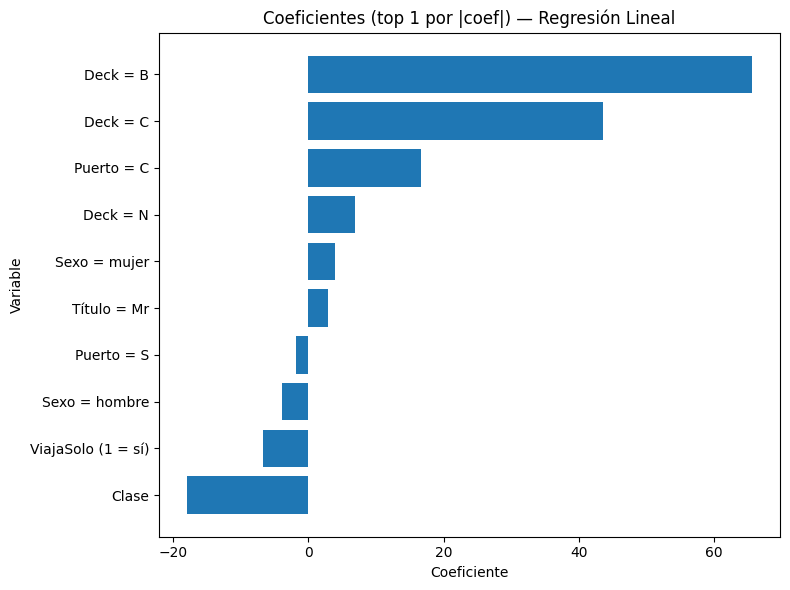

In [12]:
# BLOQUE 12

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Nombres de columnas post-preprocesamiento (intuitivos)
try:
    # Preferimos los nombres "bonitos"
    all_names = ALL_NAMES_PRETTY
except NameError:
    # Fallback si no existe ALL_NAMES_PRETTY
    try:
        all_names = list(preprocess.get_feature_names_out())
    except Exception:
        all_names = []
        # numéricas originales
        all_names.extend(num_cols)
        # categóricas (dummies one-hot)
        if len(cat_cols) > 0:
            try:
                ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
                all_names.extend(list(ohe.get_feature_names_out(cat_cols)))
            except Exception:
                all_names.extend(cat_cols)

# 2) Variables que pasaron SelectKBest
mask = pipe.named_steps["sel"].get_support()
selected_names = [all_names[i] for i, keep in enumerate(mask) if keep]

# 3) Coeficientes del modelo lineal (orden = selected_names)
coefs = pipe.named_steps["linreg"].coef_

coef_df = pd.DataFrame({
    "Variable": selected_names,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

display(coef_df.head(30))

# 4) Gráfico (top 15 por |coef|)
top = coef_df.head(10).sort_values(by="Coeficiente")
plt.figure(figsize=(8,6))
plt.barh(top["Variable"], top["Coeficiente"])
plt.title("Coeficientes (top 1 por |coef|) — Regresión Lineal")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Tasa de supervivencia por cuartiles de Fare:


,Fare_q,SurvivalRate,n,SurvivalRate_%
0,Q1 (bajo),0.197309,223,19.7
1,Q2,0.303571,224,30.4
2,Q3,0.454955,222,45.5
3,Q4 (alto),0.581081,222,58.1


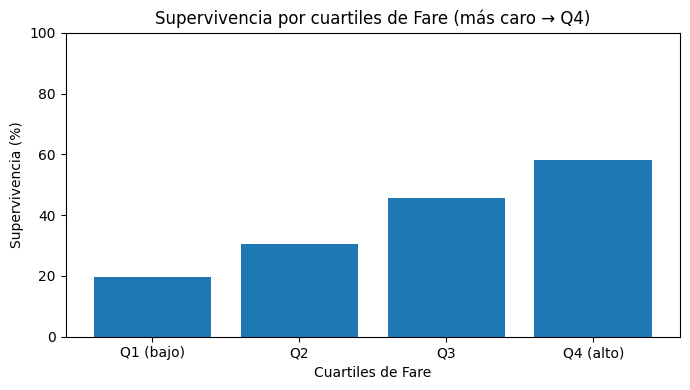

Conclusión: la tasa de supervivencia en Q4 (tarifas altas) es 58.1% vs 19.7% en Q1 (tarifas bajas), una diferencia de 38.4 puntos porcentuales.


In [13]:
# ======================================
# 13) Supervivencia por cuartiles de Fare (conclusión)
# ======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tomamos el DF de trabajo
df12 = df.copy() if 'df' in locals() else database_titanic.copy()

# Asegurar consistencia
df12['Fare'] = df12['Fare'].fillna(df12['Fare'].median())

# Si Survived no es booleana/numérica 
if not (pd.api.types.is_bool_dtype(df12['Survived']) or pd.api.types.is_numeric_dtype(df12['Survived'])):
    df12['Survived'] = df12['Survived'].astype(bool)

# Cuartiles de Fare
df12['Fare_q'] = pd.qcut(df12['Fare'], 4, labels=['Q1 (bajo)','Q2','Q3','Q4 (alto)'])

# Tabla resumen: tasa de supervivencia y n por cuartil
summary = (
    df12.groupby('Fare_q')['Survived']
        .agg(SurvivalRate='mean', n='size')
        .reset_index()
)
summary['SurvivalRate_%'] = (summary['SurvivalRate'] * 100).round(1)

print("Tasa de supervivencia por cuartiles de Fare:")
display(summary)

# Gráfico
plt.figure(figsize=(7,4))
plt.bar(summary['Fare_q'].astype(str), summary['SurvivalRate_%'])
plt.ylim(0, 100)
plt.ylabel('Supervivencia (%)')
plt.xlabel('Cuartiles de Fare')
plt.title('Supervivencia por cuartiles de Fare (más caro → Q4)')
plt.tight_layout()
plt.show()

# Conclusión automática (Q4 vs Q1)
try:
    q1 = float(summary.loc[summary['Fare_q']=='Q1 (bajo)', 'SurvivalRate'].iloc[0])
    q4 = float(summary.loc[summary['Fare_q']=='Q4 (alto)', 'SurvivalRate'].iloc[0])
    delta_pct = (q4 - q1) * 100
    print(
        f"Conclusión: la tasa de supervivencia en Q4 (tarifas altas) es "
        f"{q4*100:.1f}% vs {q1*100:.1f}% en Q1 (tarifas bajas), "
        f"una diferencia de {delta_pct:.1f} puntos porcentuales."
    )
except Exception as e:
    print("No fue posible calcular la comparación Q4 vs Q1:", e)


# Proyecto Titanic — Explicación simple (paso a paso)

Este cuaderno busca **responder una pregunta sencilla**:  
> *¿Las variables ligadas al estatus (clase, cabina, etc.) explican el **precio del pasaje (Fare)** y se relacionan con la **supervivencia**?*

Para eso, hacemos una **regresión lineal** sobre `Fare` y luego conectamos con `Survived`.

---

## Bloque 1 — Cargar los datos
- Traemos la base del Titanic desde internet y miramos una fila de ejemplo.
- **Idea:** “¿Qué columnas tenemos? ¿Luce correcto el archivo?”

## Bloque 2 — Primera revisión
- Vemos cuántas **filas/columnas** hay, **tipos de datos** y **cuántos faltan** por columna.
- **Idea:** “Antes de trabajar, entendamos el estado de la base.”

## Bloque 3 — Resumen técnico rápido
- `info()` muestra tipos y si hay **valores nulos**.
- **Idea:** confirmar lo de arriba de forma compacta.

## Bloque 4 — Formato de `Survived`
- Pasamos `Survived` a **verdadero/falso** para que sea claro.
- **Idea:** luego lo usaremos solo para análisis (no para predecir el precio).

## Bloque 5 — Recuento de nulos
- Volvemos a listar cuántos faltan (checkpoint).
- **Idea:** saber qué imputar (rellenar).

## Bloque 6 — Limpieza básica
- Rellenamos `Age` con la **mediana** (evita distorsiones por extremos).
- Rellenamos `Cabin` y `Embarked` con “Not_defined” si faltan.
- **Idea:** dejar la base **usable** sin romperse por valores vacíos.

## Bloque 7 — Verificación de nulos
- Comprobamos que la limpieza quedó bien.
- **Idea:** “ok, ya podemos modelar”.

## Bloque 8 — Parámetros del experimento
- Definimos cosas como **porcentaje de prueba** (25%), **semilla aleatoria** (reproducible) y **máx. de variables** a seleccionar.
- **Idea:** que los resultados sean comparables y ordenados.

## Bloque 9 — Preparar variables (X/y) y nuevas señales
- Copiamos la base a `df`.
- Creamos **señales sencillas**:
  - `FamilySize`: cuántos viajan juntos.
  - `IsAlone`: si viaja solo.
  - (Opcional) `Title`: título sacado del nombre (Mr/Mrs…).
  - `Deck`: **piso de la cabina** (primera letra de `Cabin`).
- Definimos el **objetivo** (`y`) = **`Fare`** y las **entradas** (`X`) = resto de columnas **útiles**.
- Quitamos columnas que **no deben predecir**: `PassengerId`, `Name`, `Ticket`, `Survived`, `Cabin`.
- Separamos qué columnas son **numéricas** y cuáles **categóricas**.
- **Idea:** tener claro **qué predigo** (precio) y **con qué lo explico** (clase, sexo, piso, etc.).

## Bloque 10 — Preprocesamiento + selección + modelo
- **Preprocesamiento**:
  - A las numéricas: completar faltantes y **escalar** (poner en misma “unidad”).
  - A las categóricas: completar faltantes y **convertir a dummies** (0/1).
- **Selección de variables**: `SelectKBest` elige las **más útiles** hasta un máximo (p. ej., 10).
- **Modelo**: **Regresión Lineal**.
- Todo se arma en un **pipeline** (tubería) para que **siempre** se apliquen los mismos pasos en el orden correcto.
- Además generamos **nombres amigables** para entender luego los coeficientes.
- **Idea:** automatizar y evitar “trampas” (no usar información del test al preparar el train).

## Bloque 11 — Entrenamiento, métricas y gráfico
- Partimos la data en **entrenamiento** (para aprender) y **prueba** (para evaluar).
- Entrenamos el pipeline y **predecimos el precio** en el conjunto de prueba.
- Métricas:
  - **MAE**: error típico medio en **£**.  
  - **RMSE**: como el MAE, pero **castiga más** los errores grandes.  
  - **R²**: qué tanto del precio **explica** el modelo (1 = perfecto; 0 = como adivinar la media).
- Gráfico **Real vs Predicho**:
  - Puntos cerca de la diagonal ⇒ buenas predicciones.
  - Si a precios altos hay más dispersión ⇒ es normal (precios “premium” son más variables).
- **Idea:** comprobar que el modelo **funciona razonablemente**.

## Bloque 12 — Qué variables empujan el precio (coeficientes)
- Mostramos las **variables más influyentes** y si **suben** o **bajan** el precio:
  - Barra a la **derecha** (coeficiente +): **aumenta** `Fare`.
  - Barra a la **izquierda** (coeficiente −): **disminuye** `Fare`.
- **Ejemplos esperables**: “Clase = 1” y ciertos “Deck” tienden a **subir** el precio; “Clase = 3” o “ViajaSolo” podrían **bajar**.
- **Idea:** explicar, en lenguaje simple, **qué factores marcan la diferencia de precio**.

## Bloque 13 — Supervivencia por cuartiles de precio (conclusión)
- Dividimos `Fare` en **4 grupos** (de barato a caro).
- Calculamos la **tasa de supervivencia** en cada grupo y la comparamos.
- **Lectura**: si el grupo **más caro (Q4)** muestra **más supervivencia** que el **más barato (Q1)**, podemos decir:
  - *“A mayor precio (estatus), mayor probabilidad de sobrevivir”*.
- **Idea:** cerrar el círculo entre **estatus → precio → desenlace**.

---

## ¿Qué aprendemos en una frase?
- El modelo muestra que **clase/piso/puerto/acompañamiento** ayudan a explicar el **precio del pasaje**, y que **quienes pagaron más** (estatus alto) **sobrevivieron más** en promedio.

---

## Requisitos del encargo (checklist)
- **Selección de variables**: ✓ `SelectKBest`  
- **Algoritmo**: ✓ Regresión Lineal  
- **Métricas**: ✓ MAE, RMSE, R²  
- **Conclusiones**: ✓ Gráfico de supervivencia por cuartiles de `Fare` y explicación
